# 1) Bibliotecas

In [22]:
import pandas as pd
from sklearn import cluster as ct
from sklearn.cluster import AffinityPropagation
from sklearn import metrics as mt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# 2) Conjunto de dados

In [3]:
x = pd.read_csv('datasets/clusterizacao/X_dataset.csv')

In [4]:
x.columns

Index(['alcohol', 'malic_acid', 'ash', 'ash_alcanity', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od280', 'proline'],
      dtype='object')

# 3) KMeans

In [7]:
results1 = []

for cluster in range(2,20,1):

    kmeans1 = ct.KMeans(n_clusters = cluster,
                      init = 'k-means++',
                      n_init = 'auto',
                      random_state = 0,
                      )
    
    kmeans1.fit(x)
    labels1 = kmeans1.fit_predict(x)
    silhouette_score1 = mt.silhouette_score(x, labels1)

    kmeans2 = ct.KMeans(n_clusters = cluster,
                      init = 'random',
                      n_init = 'auto',
                      random_state = 0)

    kmeans2.fit(x)
    labels2 = kmeans2.fit_predict(x)
    silhouette_score2 = mt.silhouette_score(x, labels2)

    results1.append([cluster, kmeans1.inertia_, kmeans2.inertia_, silhouette_score1, silhouette_score2])

df1 = pd.DataFrame(results1)
df1.columns = ['k', 'WCSS1', 'WCSS2', 'Silhouette1', 'Silhouette2']
df1

,k,WCSS1,WCSS2,Silhouette1,Silhouette2
0,2,1017.833107,1017.833107,0.213219,0.213219
1,3,829.161031,829.045584,0.231572,0.233105
2,4,754.795602,751.035363,0.206396,0.218428
3,5,694.844868,682.397495,0.207515,0.187469
4,6,638.377433,624.610051,0.189850,0.197985
5,7,601.211353,570.243861,0.190830,0.217283
6,8,570.417025,533.323654,0.163203,0.182971
7,9,514.531356,516.400544,0.176062,0.186036
8,10,492.048346,491.169912,0.176106,0.182951
9,11,476.009011,467.700781,0.178127,0.170204


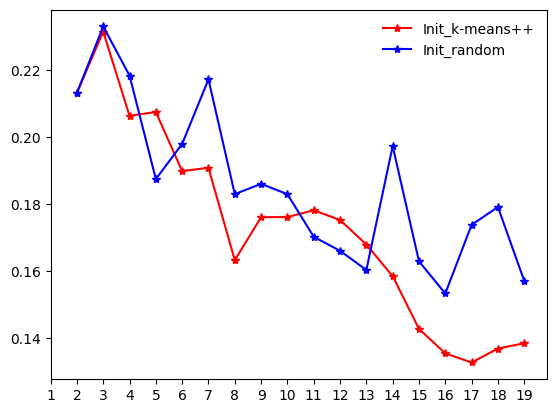

In [9]:
plt.plot(df1['k'], df1['Silhouette1'], marker = '*', color = 'red', label = 'Init_k-means++')
plt.plot(df1['k'], df1['Silhouette2'], marker = '*', color = 'blue', label = 'Init_random')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
plt.legend(frameon = False)

## 3.1) Otimização com GridSearch

In [10]:
param_grid = {'n_clusters': range(2, 12),
              'init': ['k-means++', 'random'],
              'n_init': [5, 10, 15],
              'max_iter': [100, 200, 300, 400, 500],
              'tol': [0.0001, 0.001, 0.01],
              'algorithm': ['lloyd', 'elkan'],
              'random_state': [0, 42, 100]}

kmeans = ct.KMeans()

grid_kmeans = GridSearchCV(kmeans,
                           param_grid = param_grid,
                          )

grid_kmeans.fit(x)
grid_kmeans = grid_kmeans.best_estimator_
grid_kmeans

KMeans(init='random', max_iter=100, n_clusters=11, n_init=5, random_state=100)

In [15]:
grid_kmeans.fit(x)
labels1 = grid_kmeans.fit_predict(x)
silhouette_score1 = mt.silhouette_score(x, labels1)

round(grid_kmeans.inertia_,2), labels1, round(silhouette_score1,2)

(472.96,
 array([ 9,  0,  1,  9,  1,  9,  4,  9,  4,  4,  4,  4,  4,  4,  4,  9,  9,
         9,  9,  9,  9,  1,  1,  1,  1,  7,  1,  0,  1,  4,  1,  4,  1,  9,
         1,  1,  1,  1,  0,  9,  9,  0,  4,  1,  4,  9,  4,  4,  4,  4,  4,
         4,  9,  9,  9,  9,  9,  1,  9,  0,  3,  3,  0,  8,  5,  1,  0,  0,
         3, 10,  5,  1,  5,  6,  8,  0,  0,  5, 10,  5,  8,  8,  5,  3,  8,
         8,  5,  5,  5,  5,  5,  5,  5,  8,  8, 10,  6,  8,  8,  8,  0,  0,
         5,  8,  8,  5,  8,  5,  8,  8, 10,  8,  7,  5,  5,  5,  8,  5,  0,
         8,  8,  7,  7,  8,  8,  5,  5,  7,  5,  5,  6,  6,  6,  6,  3,  3,
         5,  7,  3,  7,  7,  3,  7,  3,  6,  3,  3,  3,  3,  6,  6,  6,  6,
         3,  3,  3,  3,  7,  2,  2,  3,  3,  7,  3,  3,  3,  2,  3,  2,  6,
         3,  3,  3,  3,  3,  3,  3,  2], dtype=int32),
 np.float64(0.16))

# 4) Affinity Propagation

In [27]:
scores = []
preferences = [-1, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60]

for preference in preferences:

    affinity_propag = AffinityPropagation(preference = preference)
    affinity_propag.fit(x)
    labels = affinity_propag.predict(x)
    silhouette_score = mt.silhouette_score(x, labels)
    cluster_centers_indices = affinity_propag.cluster_centers_indices_

    scores.append( [ preference, silhouette_score, len(cluster_centers_indices) ] )
    
df2 = pd.DataFrame(scores)
df2.columns = ['Preference', 'Silhouette_Score', 'Grupos']
df2

,Preference,Silhouette_Score,Grupos
0,-1,0.050459,154
1,-5,0.164493,41
2,-10,0.171268,25
3,-15,0.160996,13
4,-20,0.158947,11
5,-25,0.158947,11
6,-30,0.146747,10
7,-35,0.185867,8
8,-40,0.162256,8
9,-45,0.189619,7
